# Spam Filter

## Importing the Dataset

In [5]:
import pandas as pd

data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Codsoft\spam.csv", encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Little bit data exploration and cleaning

In [8]:
data.drop(columns = data.columns[2:5],inplace = True)

In [9]:
data.columns = ['LABELS', 'MESSAGE']
data

,LABELS,MESSAGE
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.isnull().sum()

LABELS     0
MESSAGE    0
dtype: int64

In [22]:
data.LABELS.value_counts

<bound method IndexOpsMixin.value_counts of 0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: LABELS, Length: 5572, dtype: object>

In [25]:
data.LABELS.replace({
    "ham" : 0,
    "spam": 1
},inplace = True)

In [26]:
data.head()

,LABELS,MESSAGE
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Spliting into Train and Test Data

In [27]:
input = data.MESSAGE
output = data.LABELS

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test , Y_train,Y_test = train_test_split(input,output,test_size = 0.2,random_state = 42)

In [29]:
X_train

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: MESSAGE, Length: 4457, dtype: object

In [30]:
Y_train

1978    0
3989    1
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: LABELS, Length: 4457, dtype: int64

## Model Building and selection

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
featurer = CountVectorizer()
X_train_vectorized = featurer.fit_transform(X_train.values)
X_test_vectorized = featurer.transform(X_test)

In [93]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train_vectorized,Y_train)
print("Accuracy using Logistic Regression  :",model_1.score(X_test_vectorized,Y_test))

Accuracy using Logistic Regression  : 0.97847533632287


In [64]:
from sklearn.naive_bayes import  MultinomialNB
model_2 = MultinomialNB()
model_2.fit(X_train_vectorized,Y_train)
print("Accuracy using Naive_Bayes  :",model_2.score(X_test_vectorized,Y_test))

Accuracy using Naive_Bayes  : 0.9838565022421525


In [95]:
from sklearn.svm import SVC
model_3 = SVC()
model_3.fit(X_train_vectorized,Y_train)
print("Accuracy using Support Vector Machine  :",model_3.score(X_test_vectorized,Y_test))

Accuracy using Support Vector Machine  : 0.979372197309417


Since Accuracy of Naive_Bayes comes out to be more than that of others so we will use Naive_Bayes(model_2)

## Confusion Matrix and Metric Evaluation

In [65]:
Y_pred = model_2.predict(X_test_vectorized)

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

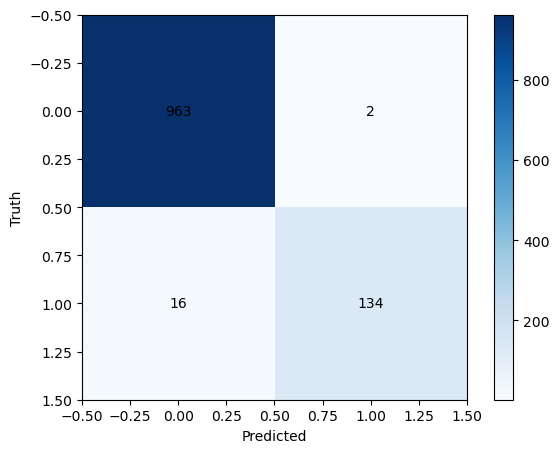

In [101]:
import matplotlib.pyplot as plt
import numpy as np

cm_np = np.array(cm)

plt.figure(figsize=(7, 5))
plt.imshow(cm_np, interpolation='nearest', cmap='Blues')

# Add annotations to the heatmap
for i in range(len(cm_np)):
    for j in range(len(cm_np[i])):
        plt.text(j, i, str(cm_np[i][j]), ha='center', va='center', color='black')

plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.colorbar()
plt.show()

In [102]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Creating Pipeline and User interactive model

In [103]:
from sklearn.pipeline import Pipeline
check_spam = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('spam_model', MultinomialNB())
])

In [104]:
check_spam.fit(X_test,Y_test)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('spam_model', MultinomialNB())])

In [105]:
check_spam.score(X_test,Y_test)

0.9937219730941704

In [89]:
User_Interactive_model = model_2 
Write_Message = [
    # Add your message to check if it can detect it or not
    "Your account have 100 debeted, is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML"
]

Write_Message_vectorized = featurer.transform(Write_Message)
predictions = User_Interactive_model.predict(Write_Message_vectorized)

for sentence, prediction in zip(Write_Message, predictions):
    if prediction == 1:
        print(" Given message is a spam message.")
    else:
        print("Given message is not a spam message.")

 Given message is a spam message.
